In [99]:
import math
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from statsmodels.graphics.boxplots import beanplot

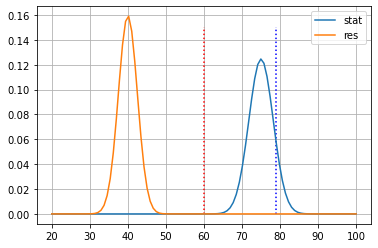

In [100]:
stat_mean = 75
stat_std = 3.2
stat_grade=79
res_mean = 40
res_std = 2.5
res_grade = 60
xs = np.linspace(20,100,100)
pdf_stat = stats.norm(stat_mean,stat_std).pdf(xs)
pdf_res = stats.norm(res_mean,res_std).pdf(xs)
plt.plot(xs,pdf_stat,label='stat')
plt.plot(xs,pdf_res,label='res')
plt.vlines(stat_grade,0,0.15,linestyles='dotted',color='b')
plt.vlines(res_grade,0,0.15,linestyles='dotted',color='r')
plt.legend()
plt.grid()

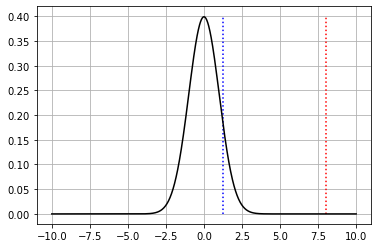

In [101]:
z_stat = (stat_grade-stat_mean)/stat_std
z_res = (res_grade-res_mean)/res_std

xs = np.linspace(-10,10,1000)
norm_pdf = stats.norm.pdf(xs)
plt.plot(xs,norm_pdf,c='black')
plt.vlines(z_stat,0,0.4,linestyles='dotted',color='b')
plt.vlines(z_res,0,0.4,linestyles='dotted',color='r')
plt.grid()

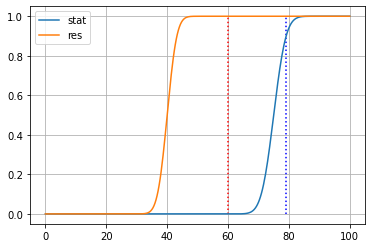

In [102]:
xs = np.linspace(0,100,301)
cdf_stat = stats.norm(stat_mean,stat_std).cdf(xs)
cdf_res = stats.norm(res_mean,res_std).cdf(xs)
plt.plot(xs,cdf_stat,label='stat')
plt.plot(xs,cdf_res,label='res')
plt.vlines(stat_grade,0,1,linestyles='dotted',color='b')
plt.vlines(res_grade,0,1,linestyles='dotted',color='r')
plt.legend()
plt.grid()

In [103]:
N = 1000
mean = 10
std = 5
n = np.random.normal(loc=mean, scale=std, size=N)
print(f'pop_mean={mean}, sample_mean={n.mean()}, pop_std={std}, sample_std={n.std()}')

pop_mean=10, sample_mean=10.325518211887312, pop_std=5, sample_std=4.93863128171851


In [104]:
u = np.random.uniform(0,2*mean, size=N)
print(f'pop_mean={mean}, sample_mean={u.mean()}, pop_std={mean/math.sqrt(3)}, sample_std={u.std()}')

pop_mean=10, sample_mean=10.053100644081574, pop_std=5.773502691896258, sample_std=5.758617712306205


In [105]:
e = np.random.exponential(scale=mean, size=N)
print(f'pop_mean={mean}, sample_mean={e.mean()}, pop_std={mean}, sample_std={e.std()}')

pop_mean=10, sample_mean=10.240458906648906, pop_std=10, sample_std=10.170594775145636


In [106]:
data = pd.DataFrame({'normal': n, 'uniform': u, 'exponential': e})

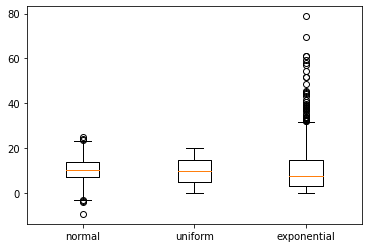

In [107]:
_ = plt.boxplot(data, labels=data.columns)

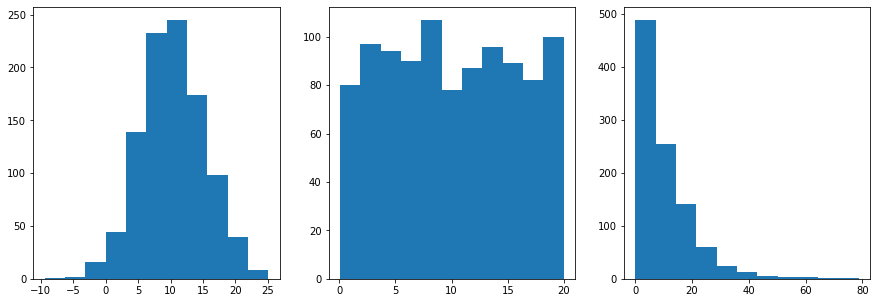

In [108]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.hist(data.normal, bins=11)
ax2.hist(data.uniform, bins=11)
_=ax3.hist(data.exponential, bins=11)


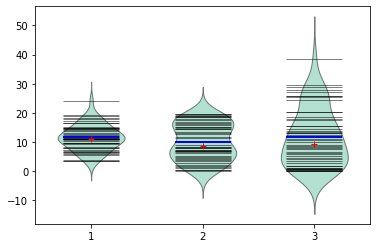

In [109]:
d = data[:50]
_=beanplot([d.normal,d.uniform,d.exponential])

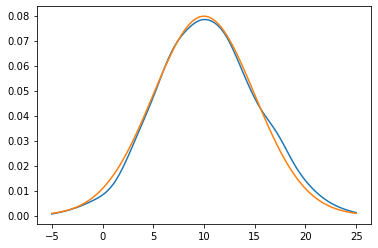

In [110]:
density = gaussian_kde(data.normal)
xs = np.linspace(mean-3*std,mean+3*std,100)
_ = plt.plot(xs,density(xs))
_ = plt.plot(xs,stats.norm(loc=mean,scale=std).pdf(xs))

In [111]:
for k in [0.5,1,2,3]:
    r = np.logical_and(data.normal>(mean-k*std), data.normal<(mean+k*std)).mean()
    print(f'±{k}σ : {r}') 

±0.5σ : 0.383
±1σ : 0.688
±2σ : 0.951
±3σ : 0.998


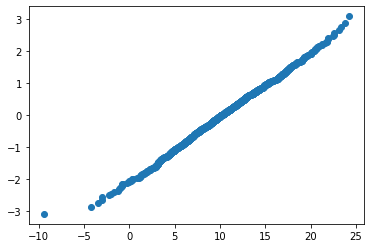

In [112]:
normal_ppf = [stats.norm.ppf(i/N) for i in range(1,N+1)]
plt.scatter(sorted(data.normal), normal_ppf)

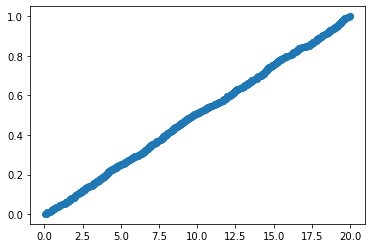

In [113]:
uniform_ppf = [stats.uniform.ppf(i/N) for i in range(1,N+1)]
plt.scatter(sorted(data.uniform), uniform_ppf )

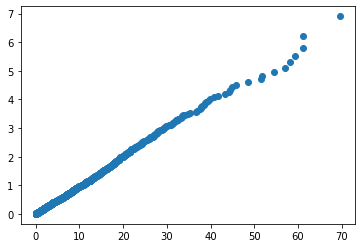

In [114]:
expon_ppf = [stats.expon.ppf(i/N) for i in range(1,N+1)]
plt.scatter(sorted(data.exponential), expon_ppf )

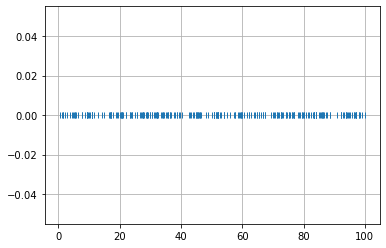

In [115]:
arrivals = np.random.uniform(0,100,size=250)
arrivals.sort()
plt.plot(arrivals,np.zeros_like(arrivals),'|')
interarrivals = np.diff(arrivals)
plt.grid()
#plt.hist(arrivals)
#plt.hist(interarrivals)
#plt.boxplot(interarrivals)

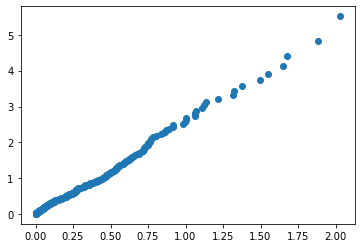

In [116]:
K = len(interarrivals)
ppf = [stats.expon.ppf(i/K) for i in range(1,K+1)]
plt.scatter(sorted(interarrivals), ppf)